# ENERGY DEMAND FORECASTING

### Analysis of the Energy Load & Weather Data:

In [1]:
#import packages
import pandas as pd
import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
#load the energy & weather data

df_ienergy=pd.read_csv("energy_dataset.csv")
df_weather=pd.read_csv("weather_features.csv")

In [3]:
#Merging Energy & Weather Data sets in to single file:
df_energy = pd.merge(df_ienergy, df_weather, how="right", on=["time"])
df_energy.head()

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
1,2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,...,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
2,2015-01-01 02:00:00+01:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,...,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
3,2015-01-01 03:00:00+01:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,...,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
4,2015-01-01 04:00:00+01:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,...,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n


In [4]:
#Understanding the data types and null values in each column
df_energy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35064 entries, 0 to 35063
Data columns (total 45 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   time                                         35064 non-null  object 
 1   generation biomass                           35045 non-null  float64
 2   generation fossil brown coal/lignite         35046 non-null  float64
 3   generation fossil coal-derived gas           35046 non-null  float64
 4   generation fossil gas                        35046 non-null  float64
 5   generation fossil hard coal                  35046 non-null  float64
 6   generation fossil oil                        35045 non-null  float64
 7   generation fossil oil shale                  35046 non-null  float64
 8   generation fossil peat                       35046 non-null  float64
 9   generation geothermal                        35046 non-null  float64
 10

1)From the above display we can see that the datatype of time column is object whereas it should be in datetime format.

2)The columns "generation hydro pumped storage aggregated" has null values.There are even missing values in other columns which needs to be handled. 

In [5]:
#We need to further understand that whether other columns are really of float type or other datatype
for i in df_energy.columns:
    print(i,"--->",df_energy[i].nunique(),"--->",df_energy[i].dtypes)

time ---> 35064 ---> object
generation biomass ---> 423 ---> float64
generation fossil brown coal/lignite ---> 956 ---> float64
generation fossil coal-derived gas ---> 1 ---> float64
generation fossil gas ---> 8297 ---> float64
generation fossil hard coal ---> 7266 ---> float64
generation fossil oil ---> 321 ---> float64
generation fossil oil shale ---> 1 ---> float64
generation fossil peat ---> 1 ---> float64
generation geothermal ---> 1 ---> float64
generation hydro pumped storage aggregated ---> 0 ---> float64
generation hydro pumped storage consumption ---> 3311 ---> float64
generation hydro run-of-river and poundage ---> 1684 ---> float64
generation hydro water reservoir ---> 7029 ---> float64
generation marine ---> 1 ---> float64
generation nuclear ---> 2388 ---> float64
generation other ---> 103 ---> float64
generation other renewable ---> 78 ---> float64
generation solar ---> 5331 ---> float64
generation waste ---> 262 ---> float64
generation wind offshore ---> 1 ---> float64
g

We see that the columns "generation fossil coal-derived gas","generation fossil oil shale","generation fossil peat","generation geothermal","generation marine","generation wind offshore" have just one value.So these should be of object type.Let us explore it further.

In [6]:
#checking the values in the columns 'generation fossil coal-derived gas','generation fossil oil shale',
#'generation fossil peat','generation geothermal','generation marine','generation wind offshore'
cols=['generation fossil coal-derived gas','generation fossil oil shale','generation fossil peat',
      'generation geothermal','generation marine','generation wind offshore']
for values in cols:
    print(df_energy[values].unique())

[ 0. nan]
[ 0. nan]
[ 0. nan]
[ 0. nan]
[ 0. nan]
[ 0. nan]


We can see from the above output that these columns doesnot have any values other than 0.So we delete these columns.

In [7]:
#deleting the columns above
df_energy=df_energy.drop(['generation fossil coal-derived gas','generation fossil oil shale','generation fossil peat',
                          'generation geothermal','generation marine','generation wind offshore',
                          'forecast wind offshore eday ahead'],axis=1)

In [8]:
#dropping the column 'generation hydro pumped storage aggregated' as there are no values in it & City Name-No impact for model.
df_energy=df_energy.drop(['generation hydro pumped storage aggregated','city_name','weather_icon'],axis=1)

In [9]:
#conversion of datatypes of columns
cols=['rain_1h','snow_3h','weather_description','weather_main']
df_energy[cols]=df_energy[cols].astype(object)

In [10]:
#Changing the datatype of time column
df_energy[['Date','Time']]=df_energy['time'].str.split(" ",n=1,expand=True)
df_energy['Date']=pd.to_datetime(df_energy['Date'])
df_energy[['Time','Spare']]=df_energy['Time'].str.split("+",n=1,expand=True)

In [11]:
df_energy=df_energy.drop(["Spare","time"],axis=1)
df_energy['Time']=pd.to_datetime(df_energy['Time'],format='%H:%M:%S')
df_energy['Time']=df_energy['Time'].dt.time

In [12]:
#Finally checking the columns and the datatype of all the columns 
df_energy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35064 entries, 0 to 35063
Data columns (total 36 columns):
 #   Column                                       Non-Null Count  Dtype         
---  ------                                       --------------  -----         
 0   generation biomass                           35045 non-null  float64       
 1   generation fossil brown coal/lignite         35046 non-null  float64       
 2   generation fossil gas                        35046 non-null  float64       
 3   generation fossil hard coal                  35046 non-null  float64       
 4   generation fossil oil                        35045 non-null  float64       
 5   generation hydro pumped storage consumption  35045 non-null  float64       
 6   generation hydro run-of-river and poundage   35045 non-null  float64       
 7   generation hydro water reservoir             35046 non-null  float64       
 8   generation nuclear                           35047 non-null  float64       


We can see that the columns have been handled and the datatype of time column has been changed.

### Extrapolatory Data Analysis 

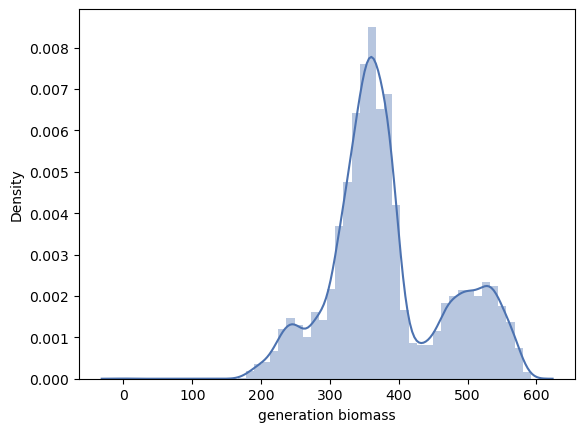

In [13]:
import matplotlib.pyplot as plt

sns.set_color_codes()
sns.distplot(df_energy['generation biomass'], color="b")
plt.show()

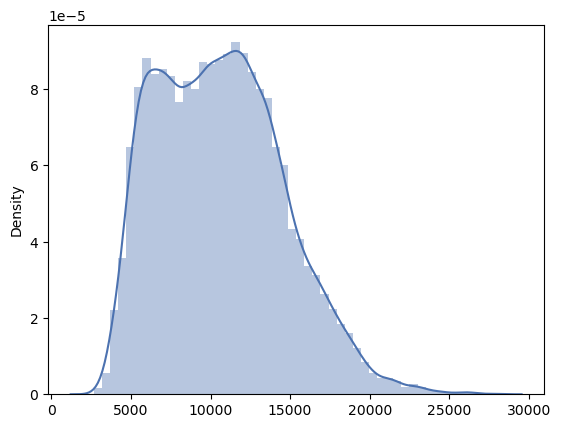

In [14]:
#creating a new variable fossil and adding up all the power generated from fossil

fossil=df_energy['generation fossil brown coal/lignite']+df_energy['generation fossil gas']+df_energy['generation fossil hard coal']+df_energy['generation fossil oil']

sns.distplot(fossil, color="b")
plt.show()

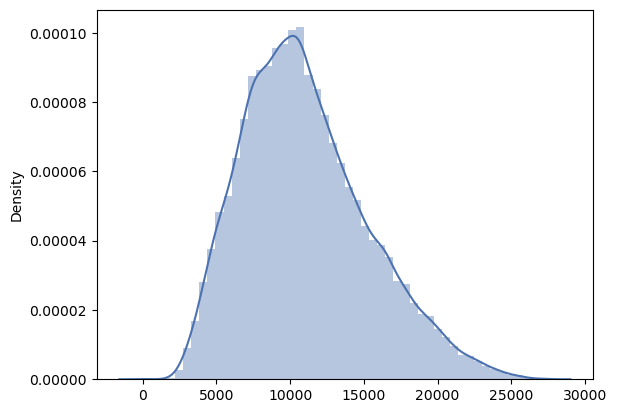

In [15]:
#creating a variable renewable and storing adding up all the powers generated from renewable source of energy
renewable=df_energy['generation hydro run-of-river and poundage']+df_energy['generation hydro water reservoir']+df_energy['generation hydro pumped storage consumption']+df_energy['generation wind onshore']+df_energy['generation other renewable']+df_energy['generation solar']
sns.distplot(renewable, color="b")
plt.show()

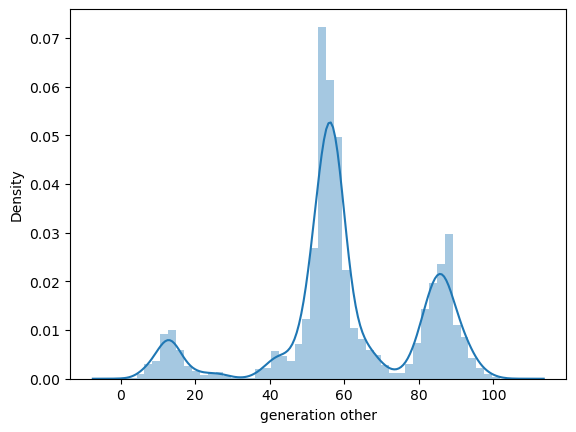

In [16]:
sns.distplot(df_energy['generation other'])
plt.show()

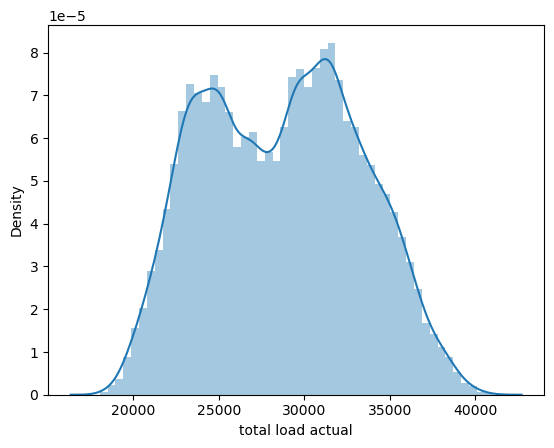

In [17]:
sns.distplot(df_energy['total load actual'])
plt.show()

In [18]:
df_energy['total load actual'].skew()

0.061900903654842104

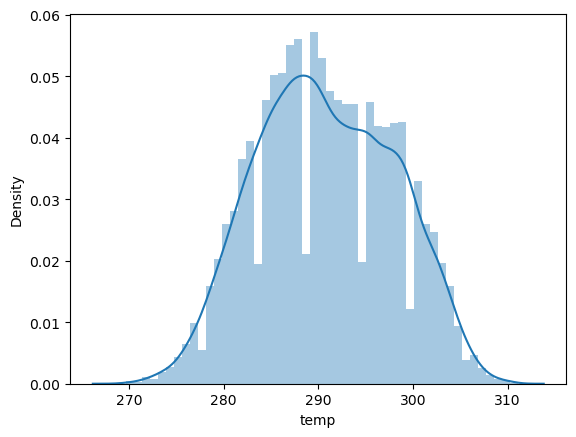

In [19]:
sns.distplot(df_energy['temp'])
plt.show()

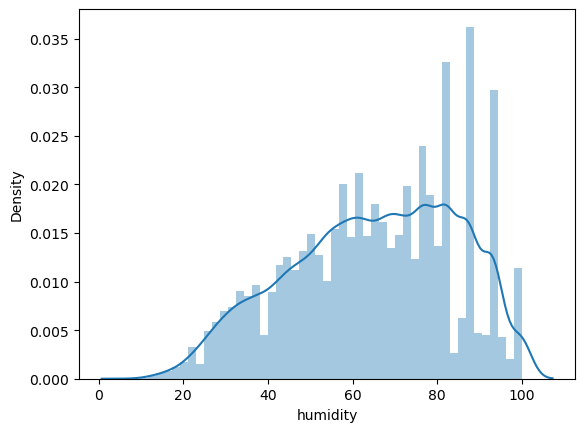

In [20]:
sns.distplot(df_energy['humidity'])
plt.show()

From the graphs plotted above we can see that maximum graphs are normally distributed.The new variable renewable is slightly right skewed and the feature humidity is slightly left skewed.

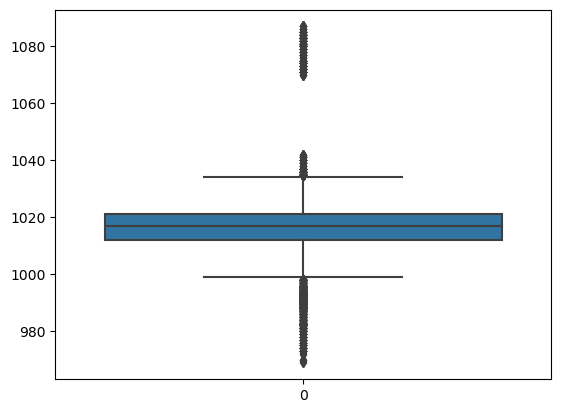

In [21]:
sns.boxplot(df_energy['pressure'])
plt.show()

<Axes: >

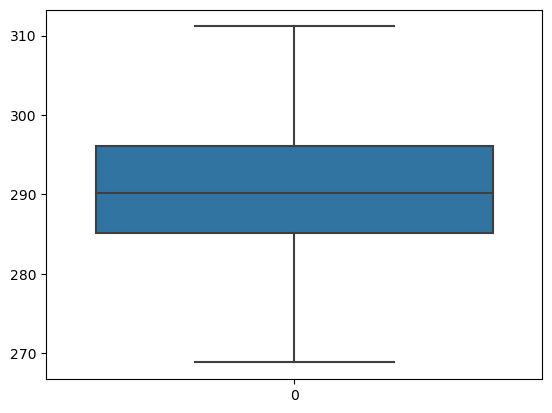

In [22]:
sns.boxplot(df_energy['temp'])

<Axes: >

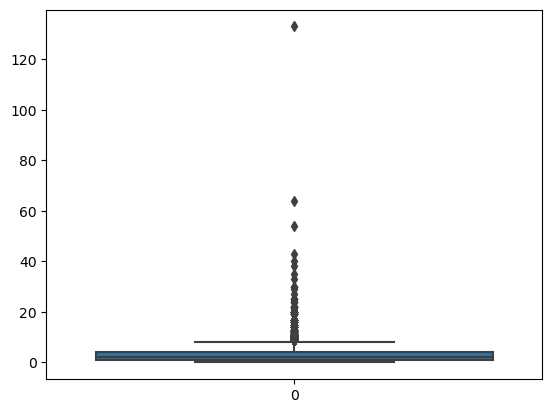

In [23]:
sns.boxplot(df_energy['wind_speed'])

<Axes: >

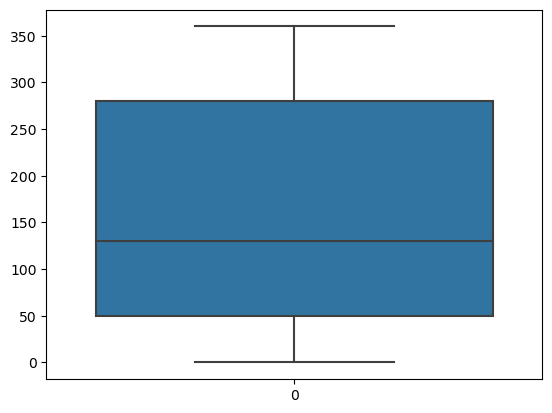

In [24]:
sns.boxplot(df_energy['wind_deg'])

We can see that there are many outliers in the pressure and temperature column.We will handle these outliers.

In [25]:
from scipy.stats.mstats import winsorize
df_energy['pressure']=winsorize(df_energy['pressure'],(0.1,0.1))

In [26]:
df_energy['wind_speed']=winsorize(df_energy['wind_speed'],(0.01,0.1))

#### Checking the columns after handling the outliers

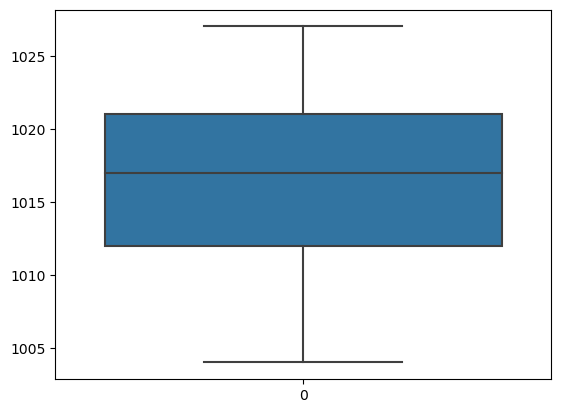

In [27]:
sns.boxplot(df_energy['pressure'])
plt.show()

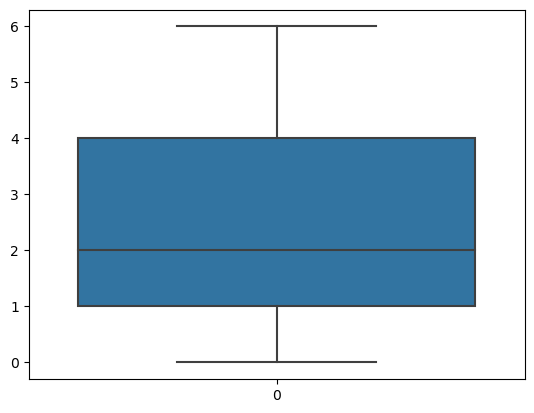

In [28]:
sns.boxplot(df_energy['wind_speed'])
plt.show()

### Checking for the missing values

In [29]:
missing=df_energy.isnull().sum()
missing_percent=(df_energy.isna().mean())*100
pd.concat([missing,missing_percent],axis=1,keys=["missing","missing_percent"])

,missing,missing_percent
generation biomass,19,0.054187
generation fossil brown coal/lignite,18,0.051335
generation fossil gas,18,0.051335
generation fossil hard coal,18,0.051335
generation fossil oil,19,0.054187
generation hydro pumped storage consumption,19,0.054187
generation hydro run-of-river and poundage,19,0.054187
generation hydro water reservoir,18,0.051335
generation nuclear,17,0.048483
generation other,18,0.051335


In [30]:
#making a dataframe of all missing values
df1=df_energy[df_energy.isnull().any(axis=1)]

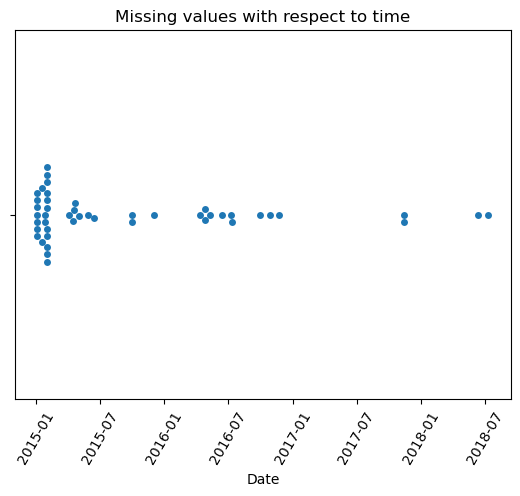

In [31]:
#plotting a swarmplot of all missing values with respect to date
sns.swarmplot(x='Date', data=df1)
plt.xticks(rotation=60)
plt.title('Missing values with respect to time')
plt.show()

We can see there are many missing values in the starting of the dataframe.

In [32]:
# Filling missing values with mean:
df_energy = df_energy.fillna(df_energy.mean())

In [33]:
#Checking the dataframe after handling the missing values
df_energy.isnull().sum()

generation biomass                             0
generation fossil brown coal/lignite           0
generation fossil gas                          0
generation fossil hard coal                    0
generation fossil oil                          0
generation hydro pumped storage consumption    0
generation hydro run-of-river and poundage     0
generation hydro water reservoir               0
generation nuclear                             0
generation other                               0
generation other renewable                     0
generation solar                               0
generation waste                               0
generation wind onshore                        0
forecast solar day ahead                       0
forecast wind onshore day ahead                0
total load forecast                            0
total load actual                              0
price day ahead                                0
price actual                                   0
temp                

In [34]:
#Findig the correlation between variables
df_energy.corr()

,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,...,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id
generation biomass,1.000000,0.229804,-0.021660,0.433522,0.459527,-0.044897,-0.284876,-0.033674,-0.021278,0.658488,...,0.017645,0.032416,0.026900,-0.068688,-0.039505,0.053415,0.042437,0.001842,0.022510,-0.031066
generation fossil brown coal/lignite,0.229804,1.000000,0.499808,0.768710,0.314868,-0.323770,-0.525003,-0.229455,-0.008440,0.097600,...,0.036763,0.089336,0.123626,-0.111914,-0.085272,-0.005140,-0.017935,-0.016342,0.042526,-0.027244
generation fossil gas,-0.021660,0.499808,1.000000,0.541635,0.309623,-0.420643,-0.271527,0.060173,-0.112903,-0.066279,...,0.092699,0.051224,-0.013718,-0.039136,-0.094694,-0.010169,-0.025352,-0.012531,0.015530,-0.009745
generation fossil hard coal,0.433522,0.768710,0.541635,1.000000,0.440831,-0.406113,-0.497933,-0.157677,-0.023930,0.264383,...,0.043781,0.093459,0.085835,-0.108080,-0.089256,0.016797,0.002203,-0.015617,0.046175,-0.039830
generation fossil oil,0.459527,0.314868,0.309623,0.440831,1.000000,-0.331010,-0.106752,0.160464,0.015618,0.375045,...,0.086821,0.043918,-0.061781,-0.024338,-0.082119,0.028032,0.017182,-0.008545,0.005795,-0.016750
generation hydro pumped storage consumption,-0.044897,-0.323770,-0.420643,-0.406113,-0.331010,1.000000,0.053162,-0.234340,0.013081,0.021508,...,-0.201712,-0.022578,0.086124,0.023999,0.129726,-0.014171,-0.008688,-0.006828,-0.037267,0.014827
generation hydro run-of-river and poundage,-0.284876,-0.525003,-0.271527,-0.497933,-0.106752,0.053162,1.000000,0.652764,-0.124040,-0.127339,...,-0.073033,-0.111468,-0.160931,0.155317,0.063129,0.020571,0.011857,0.016988,-0.015220,-0.005882
generation hydro water reservoir,-0.033674,-0.229455,0.060173,-0.157677,0.160464,-0.234340,0.652764,1.000000,-0.049558,0.065099,...,-0.005347,-0.069568,-0.162203,0.092048,-0.017793,0.037582,0.015283,0.003490,0.023250,-0.029936
generation nuclear,-0.021278,-0.008440,-0.112903,-0.023930,0.015618,0.013081,-0.124040,-0.049558,1.000000,0.041155,...,-0.034846,0.089981,0.036521,0.014078,0.015729,0.042752,0.010166,0.011364,0.035927,-0.015198
generation other,0.658488,0.097600,-0.066279,0.264383,0.375045,0.021508,-0.127339,0.065099,0.041155,1.000000,...,-0.041015,0.028698,0.015986,-0.045194,0.002194,0.018265,0.031360,-0.005240,0.022084,-0.031293


<Axes: >

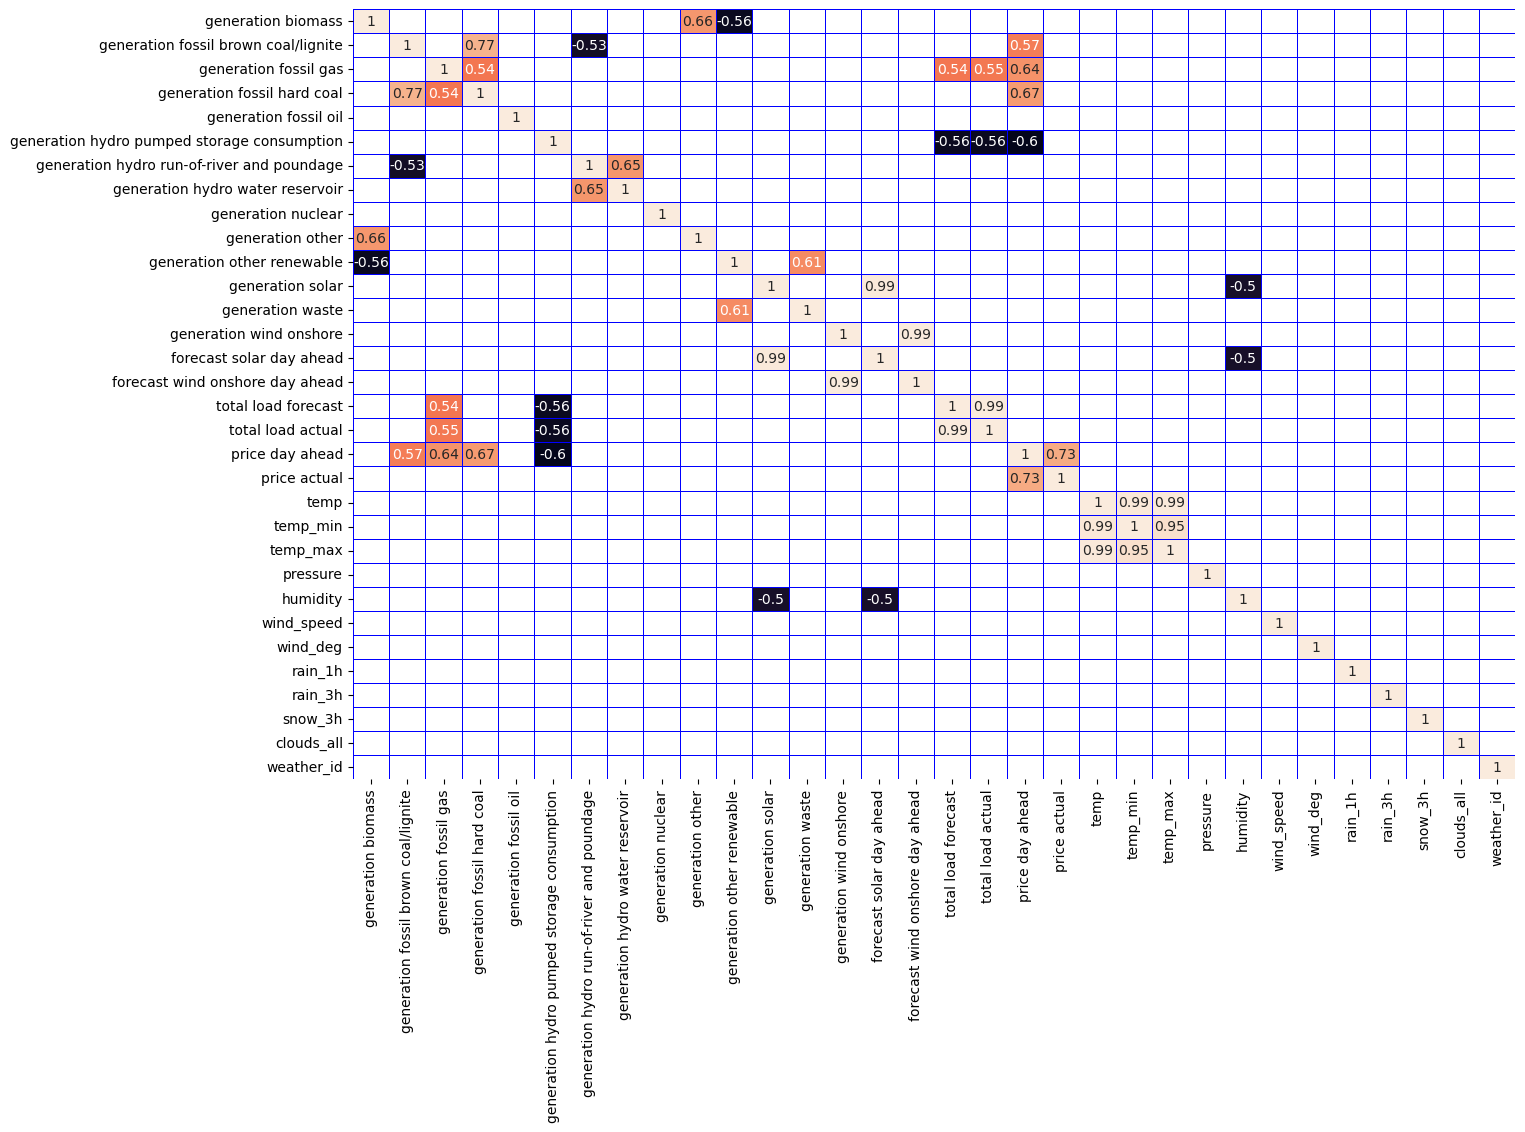

In [35]:
#plotting the correlation between variables in which correlation is high
df5=df_energy.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(df5[(df5>0.5)|(df5<-0.5)],annot=True,cbar=False,linewidth=0.5,linecolor='blue')

The temperature minumim column and the temperature maximum column are having high correlation.So we will drop these columns to avoid multicollinearity.

In [36]:
df_energy=df_energy.drop(['temp_min','temp_max'],axis=1)

Now our dataset is ready for model building

## Data Preparation for model building

In [37]:
#segregating the categorical and numeric variables into two variables
df_cat=df_energy.select_dtypes(include=object)
df_num=df_energy.select_dtypes(include=np.number)

In [38]:
#getting dummies for categorical variables
df_dummy=pd.get_dummies(df_cat,drop_first=True)

In [39]:
#creating the final dataframe for model building
df_final=pd.concat([df_dummy,df_num],axis=1)

In [40]:
X=df_final.drop('total load actual',axis=1)

In [41]:
y=df_final['total load actual']

In [42]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

# add the intercept column using 'add_constant()'
X= sm.add_constant(X)

# split data into train subset and test subset for predictor and target variables
# 'test_size' returns the proportion of data to be included in the test set
# set 'random_state' to generate the same dataset each time you run the code 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

# check the dimensions of the train & test subset for print dimension of predictors train set
print("The shape of X_train is:",X_train.shape)

# print dimension of predictors test set
print("The shape of X_test is:",X_test.shape)

# print dimension of target train set
print("The shape of y_train is:",y_train.shape)

# print dimension of target test set
print("The shape of y_test is:",y_test.shape)

The shape of X_train is: (24544, 84)
The shape of X_test is: (10520, 84)
The shape of y_train is: (24544,)
The shape of y_test is: (10520,)


## Ordinary Least Square Model-1

In [43]:
from sklearn.linear_model import LinearRegression
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

In [44]:
# build a full model using OLS()
linreg_full_model = sm.OLS(y_train, X_train).fit()

In [45]:
# print the summary output
linreg_full_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      total load actual   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 3.315e+04
Date:                Tue, 31 Oct 2023   Prob (F-statistic):               0.00
Time:                        02:24:39   Log-Likelihood:            -1.8497e+05
No. Observations:               24544   AIC:                         3.701e+05
Df Residuals:                   24469   BIC:                         3.707e+05
Df Model:                          74                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                            -1505.1062    238.513     -6.310      0.000   -1972.607   -1037.605
weather_main_clouds                                267.0523     75.244      3.549      0.000     119.569     414.536
weather_main_drizzle                              -974.6489    187.361     -5.202      0.000   -1341.889    -607.409
weather_main_fog                                   -17.8494     44.882     -0.398      0.691    -105.821      70.122
weather_main_haze                                  308.9549    120.625      2.561      0.010      72.523     545.387
weather_main_mist                                   19.6629     30.559      0.643      0.520     -40.235      79.561
weather_main_rain                                 -345.1443    222.488     -1.551      0.121    -781.235      90.946
weather_main_smoke                                 -24.5482    121.066     -0.203      0.839    -261.846     212.749
weather_main_thunderstorm                        -1100.6034    182.681     -6.025      0.000   -1458.668    -742.538
weather_description_drizzle                       -367.8728    359.985     -1.022      0.307   -1073.466     337.720
weather_description_few clouds                      74.7216     25.018      2.987      0.003      25.685     123.758
weather_description_fog                            -17.8494     44.882     -0.398      0.691    -105.821      70.122
weather_description_haze                           308.9549    120.625      2.561      0.010      72.523     545.387
weather_description_heavy intensity drizzle       -397.5982    359.034     -1.107      0.268   -1101.327     306.131
weather_description_heavy intensity rain           116.6519     70.575      1.653      0.098     -21.679     254.983
weather_description_heavy intensity shower rain   -446.6575    141.380     -3.159      0.002    -723.772    -169.543
weather_description_light intensity drizzle       -209.1779    187.803     -1.114      0.265    -577.284     158.928
weather_description_light intensity shower rain   -252.4173    224.944     -1.122      0.262    -693.322     188.487
weather_description_light rain                    -204.1652    217.093     -0.940      0.347    -629.681     221.351
weather_description_mist                            19.6629     30.559      0.643      0.520     -40.235      79.561
weather_description_moderate rain                   27.1292    164.102      0.165      0.869    -294.521     348.780
weather_description_overcast clouds                 78.2375     30.807      2.540      0.011      17.855     138.620
weather_description_proximity thunderstorm        -199.7361    102.451     -1.950      0.051    -400.546       1.073
weather_description_scattered clouds     

In [46]:
# predict the 'log_Property_Sale_Price' using predict()
predicted = linreg_full_model.predict(X_test)

In [47]:
from statsmodels.tools.eval_measures import rmse

# calculate rmse using rmse()
linreg_full_model_rmse = rmse(y_test, predicted)

# calculate R-squared using rsquared
linreg_full_model_rsquared = linreg_full_model.rsquared

# calculate Adjusted R-Squared using rsquared_adj
linreg_full_model_rsquared_adj = linreg_full_model.rsquared_adj 

In [48]:
# create a list of column names
cols = ['Model', 'RMSE', 'R-Squared', 'Adj. R-Squared']

# create a empty dataframe of the colums
result_tabulation = pd.DataFrame(columns = cols)

# compile the required information
linreg_full_model_with_metrics = pd.Series({'Model': "Linreg full model",'RMSE':linreg_full_model_rmse,
                     'R-Squared': linreg_full_model_rsquared,'Adj. R-Squared': linreg_full_model_rsquared_adj})

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
result_tabulation = result_tabulation.append(linreg_full_model_with_metrics, ignore_index = True)

# print the result table
result_tabulation

,Model,RMSE,R-Squared,Adj. R-Squared
0,Linreg full model,444.779173,0.990125,0.990095


## Total Generation from Fossil - Using Feature Engineering - Model-2

In [49]:
# create a new variable 'TotalFossil' using the variables 'generation fossil brown coal/lignite',
 #'generation fossil gas', 'generation fossil hard coal', and 'generation fossil oil'
# add the new variable to the dataframe 'df_house'
df_energy['TotalFossil'] = df_energy['generation fossil brown coal/lignite'] + df_energy['generation fossil gas'] + df_energy['generation fossil hard coal'] + df_energy['generation fossil oil']

In [50]:
#segregating the variables into categorical and continuous
df_num=df_energy.select_dtypes(include=np.number)
df_cat=df_energy.select_dtypes(include=object)

In [51]:
#dropping the redundant variables
df_num=df_num.drop(['generation fossil brown coal/lignite','generation fossil gas', 'generation fossil hard coal',
       'generation fossil oil'], axis=1)

In [52]:
#getting dummies for categorical variables
df_dummy=pd.get_dummies(df_cat,drop_first=True)

#creating the final dataframe for model building
df_final=pd.concat([df_dummy,df_num],axis=1)

X=df_final.drop('total load actual',axis=1)

y=df_final['total load actual']

In [53]:
# add the intercept column using 'add_constant()'
X= sm.add_constant(X)

# split data into train subset and test subset for predictor and target variables
# 'test_size' returns the proportion of data to be included in the test set
# set 'random_state' to generate the same dataset each time you run the code 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

# check the dimensions of the train & test subset for print dimension of predictors train set
print("The shape of X_train is:",X_train.shape)

# print dimension of predictors test set
print("The shape of X_test is:",X_test.shape)

# print dimension of target train set
print("The shape of y_train is:",y_train.shape)

# print dimension of target test set
print("The shape of y_test is:",y_test.shape)

The shape of X_train is: (24544, 81)
The shape of X_test is: (10520, 81)
The shape of y_train is: (24544,)
The shape of y_test is: (10520,)


In [54]:
linreg_full_model_fossil = sm.OLS(y_train, X_train).fit()

In [55]:
predicted = linreg_full_model_fossil.predict(X_test)

In [56]:
linreg_full_model_fossil_rmse = rmse(y_test, predicted)

# calculate R-squared using rsquared
linreg_full_model_fossil_rsquared = linreg_full_model_fossil.rsquared

# calculate Adjusted R-Squared using rsquared_adj
linreg_full_model_fossil_rsquared_adj = linreg_full_model_fossil.rsquared_adj

In [57]:
# create the result table for all accuracy scores
# accuracy measures considered for model comparision are RMSE, R-squared value and Adjusted R-squared value
# create a list of column names
cols = ['Model', 'RMSE', 'R-Squared', 'Adj. R-Squared']

# create a empty dataframe of the colums
# columns: specifies the columns to be selected
# compile the required information
linreg_full_model_fossil = pd.Series({'Model': "Linreg full model with new feature(Total generation by Fossil) ",
                     'RMSE':linreg_full_model_fossil_rmse,'R-Squared': linreg_full_model_fossil_rsquared,
                     'Adj. R-Squared': linreg_full_model_fossil_rsquared_adj})

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
result_tabulation = result_tabulation.append(linreg_full_model_fossil, ignore_index = True)

# print the result table
result_tabulation

,Model,RMSE,R-Squared,Adj. R-Squared
0,Linreg full model,444.779173,0.990125,0.990095
1,Linreg full model with new feature(Total gener...,444.890374,0.990118,0.990089


## Total Generation from Renewable Energy - Using Feature Engineering - Model-3

In [58]:
#dropping the feature added
df_energy=df_energy.drop('TotalFossil',axis=1)

In [59]:
#creating a variable renewable in which total power generation by renewable energies are added
df_energy['renewable']=df_energy['generation other renewable']+df_energy['generation solar']+df_energy['generation wind onshore']+df_energy['generation hydro pumped storage consumption']+df_energy['generation hydro run-of-river and poundage']+df_energy['generation hydro water reservoir']

In [60]:
#segregating the categorical and numerical variables
df_num=df_energy.select_dtypes(include=np.number)
df_cat=df_energy.select_dtypes(include=object)

In [61]:
#dropping the redundant variables
df_num.drop(['generation hydro pumped storage consumption','generation hydro run-of-river and poundage',
             'generation hydro water reservoir','generation other renewable', 'generation solar',
             'generation wind onshore'],axis=1,inplace=True)

In [62]:
#getting dummies for categorical variables
df_dummy=pd.get_dummies(df_cat,drop_first=True)

#creating the final dataframe for model building
df_final=pd.concat([df_dummy,df_num],axis=1)

X=df_final.drop('total load actual',axis=1)
y=df_final['total load actual']

In [63]:
# add the intercept column using 'add_constant()'
X= sm.add_constant(X)

# split data into train subset and test subset for predictor and target variables
# 'test_size' returns the proportion of data to be included in the test set
# set 'random_state' to generate the same dataset each time you run the code 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

# check the dimensions of the train & test subset for print dimension of predictors train set
print("The shape of X_train is:",X_train.shape)

# print dimension of predictors test set
print("The shape of X_test is:",X_test.shape)

# print dimension of target train set
print("The shape of y_train is:",y_train.shape)

# print dimension of target test set
print("The shape of y_test is:",y_test.shape)

The shape of X_train is: (24544, 79)
The shape of X_test is: (10520, 79)
The shape of y_train is: (24544,)
The shape of y_test is: (10520,)


In [64]:
linreg_full_model_renewable = sm.OLS(y_train, X_train).fit()

In [65]:
predicted = linreg_full_model_renewable.predict(X_test)

In [66]:
linreg_full_model_renewable_rmse = rmse(y_test, predicted)

# calculate R-squared using rsquared
linreg_full_model_renewable_rsquared = linreg_full_model_renewable.rsquared

# calculate Adjusted R-Squared using rsquared_adj
linreg_full_model_renewable_rsquared_adj = linreg_full_model_renewable.rsquared_adj 

In [67]:
#create a list of column names
cols = ['Model', 'RMSE', 'R-Squared', 'Adj. R-Squared']

# compile the required information
linreg_full_model_renewable = pd.Series({'Model': "Linreg full model with new feature(renewable) ",
                                    'RMSE':linreg_full_model_renewable_rmse,'R-Squared': linreg_full_model_renewable_rsquared,
                                    'Adj. R-Squared': linreg_full_model_renewable_rsquared_adj})

# append our result table using append()
result_tabulation = result_tabulation.append(linreg_full_model_renewable, ignore_index = True)

# print the result table
result_tabulation

,Model,RMSE,R-Squared,Adj. R-Squared
0,Linreg full model,444.779173,0.990125,0.990095
1,Linreg full model with new feature(Total gener...,444.890374,0.990118,0.990089
2,Linreg full model with new feature(renewable),463.718593,0.989307,0.989277


In [68]:
#dropping the column added
df_energy=df_energy.drop(['renewable'],axis=1)

## Selecting the Important Features by using VIF (Variance Inflation Factor)-Model-4

In [69]:
#dropping the dependent variable
df_features = df_energy.drop(['total load actual'], axis = 1)

# filter the numerical features in the dataset
df_numeric_features_vif = df_features.select_dtypes(include=[np.number])

In [70]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# for each numeric variable, calculate VIF and save it in a dataframe 'vif'

# use for loop to iterate the VIF function 
for ind in range(len(df_numeric_features_vif.columns)):
    
    # create an empty dataframe
    vif = pd.DataFrame()

    # calculate VIF using list comprehension
    vif["VIF_Factor"] = [variance_inflation_factor(df_numeric_features_vif.values,i) for i in range(df_numeric_features_vif.shape[1])]

    # create a column of variable names
    vif["Features"] = df_numeric_features_vif.columns

    # filter the variables with VIF greater than 10 and store it in a dataframe 'multi' 
    # one can choose the threshold other than 10 (it depends on the business requirements)
    multi = vif[vif['VIF_Factor'] > 10]
    
    # if dataframe 'multi' is not empty, then sort the dataframe by VIF values
    # if dataframe 'multi' is empty (i.e. all VIF <= 10), then print the dataframe 'vif' and break the for loop using 'break' 
    if(multi.empty == False):
        df_sorted = multi.sort_values(by = 'VIF_Factor', ascending = False)
    else:
        print(vif)
        break
    
    # use if-else to drop the variable with the highest VIF
    #  else print the final dataframe 'vif' with all values after removal of variables with VIF less than 10  
    if (df_sorted.empty == False):
        df_numeric_features_vif = df_numeric_features_vif.drop(df_sorted.Features.iloc[0], axis=1)
    else:
        print(vif)

    VIF_Factor                                     Features
0     4.367841         generation fossil brown coal/lignite
1     8.207508                        generation fossil gas
2     1.829805  generation hydro pumped storage consumption
3     3.471799             generation hydro water reservoir
4     8.155409                             generation other
5     1.891593                             generation solar
6     4.903039                      generation wind onshore
7     3.617458                                   wind_speed
8     3.010523                                     wind_deg
9     1.086021                                      rain_1h
10    1.010797                                      rain_3h
11    1.002860                                      snow_3h
12    1.775220                                   clouds_all


In [71]:
#creating the final dataframe for model building
df_final = pd.concat([df_numeric_features_vif, df_dummy], axis=1)
X=df_final
y=df_energy[['total load actual']]

In [72]:
# add the intercept column using 'add_constant()'
X= sm.add_constant(X)

# split data into train subset and test subset for predictor and target variables
# 'test_size' returns the proportion of data to be included in the test set
# set 'random_state' to generate the same dataset each time you run the code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

# check the dimensions of the train & test subset for 
# print dimension of predictors train set
print("The shape of X_train is:",X_train.shape)

# print dimension of predictors test set
print("The shape of X_test is:",X_test.shape)

# print dimension of target train set
print("The shape of y_train is:",y_train.shape)

# print dimension of target test set
print("The shape of y_test is:",y_test.shape)

The shape of X_train is: (24544, 68)
The shape of X_test is: (10520, 68)
The shape of y_train is: (24544, 1)
The shape of y_test is: (10520, 1)


In [73]:
# build a full model using OLS()
# consider the log of sales price as the target variable
# use fit() to fit the model on train data
linreg_full_model_vif = sm.OLS(y_train, X_train).fit()

# print the summary output
print(linreg_full_model_vif.summary())

                            OLS Regression Results                            
Dep. Variable:      total load actual   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     2635.
Date:                Tue, 31 Oct 2023   Prob (F-statistic):               0.00
Time:                        02:24:51   Log-Likelihood:            -2.1716e+05
No. Observations:               24544   AIC:                         4.344e+05
Df Residuals:                   24484   BIC:                         4.349e+05
Df Model:                          59                                         
Covariance Type:            nonrobust                                         
                                                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------

In [74]:
# predict the 'log_Property_Sale_Price' using predict()
predicted = linreg_full_model_vif.predict(X_test)

In [75]:
# calculate rmse using rmse()
linreg_full_model_vif_rmse = rmse(y_test, predicted)

# calculate R-squared using rsquared
linreg_full_model_vif_rsquared = linreg_full_model_vif.rsquared

# calculate Adjusted R-Squared using rsquared_adj
linreg_full_model_vif_rsquared_adj = linreg_full_model_vif.rsquared_adj 

In [76]:
# append the accuracy scores to the table
# compile the required information
linreg_full_model_vif_metrics = pd.Series({'Model': "Linreg with VIF",'RMSE': rmse(y_test,predicted)[0],
                                                'R-Squared': linreg_full_model_vif_rsquared,
                                                'Adj. R-Squared': linreg_full_model_vif_rsquared_adj})

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
result_tabulation = result_tabulation.append(linreg_full_model_vif_metrics, ignore_index = True)

# print the result table
result_tabulation

,Model,RMSE,R-Squared,Adj. R-Squared
0,Linreg full model,444.779173,0.990125,0.990095
1,Linreg full model with new feature(Total gener...,444.890374,0.990118,0.990089
2,Linreg full model with new feature(renewable),463.718593,0.989307,0.989277
3,Linreg with VIF,6474.089474,0.863933,0.863605


## Forward Elimination Model-5

In [77]:
# filter the numerical features in the dataset using select_dtypes()
df_numeric_features = df_energy.select_dtypes(include=np.number)

# filter the categorical features in the dataset using select_dtypes()
df_categoric_features = df_energy.select_dtypes(include = object)

In [78]:
# use 'get_dummies()' from pandas to create dummy variables
df_dummy = pd.get_dummies(df_categoric_features, drop_first = True)

In [79]:
# concatenate the numerical and dummy encoded categorical variables using concat()
df_final = pd.concat([df_numeric_features, df_dummy], axis=1)
X = df_final.drop(['total load actual'], axis = 1)
y = df_final[['total load actual']]

In [80]:
# add the intercept column using 'add_constant()'
X= sm.add_constant(X)

# split data into train subset and test subset for predictor and target variables
# 'test_size' returns the proportion of data to be included in the test set
# set 'random_state' to generate the same dataset each time you run the code 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

# check the dimensions of the train & test subset for print dimension of predictors train set
print("The shape of X_train is:",X_train.shape)

# print dimension of predictors test set
print("The shape of X_test is:",X_test.shape)

# print dimension of target train set
print("The shape of y_train is:",y_train.shape)

# print dimension of target test set
print("The shape of y_test is:",y_test.shape)

The shape of X_train is: (24544, 84)
The shape of X_test is: (10520, 84)
The shape of y_train is: (24544, 1)
The shape of y_test is: (10520, 1)


In [81]:
# initiate linear regression model to use in feature selection
linreg = LinearRegression()

# build step forward selection
linreg_forward = sfs(estimator = linreg, k_features = 'best', forward = True, verbose = 2, scoring = 'r2', n_jobs = -1)

sfs_forward = linreg_forward.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done  84 out of  84 | elapsed:    4.0s finished

[2023-10-31 02:24:57] Features: 1/84 -- score: 0.9886285628693722[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  68 out of  83 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  83 out of  83 | elapsed:    0.6s finished

[2023-10-31 02:24:58] Features: 2/84 -- score: 0.9887310250544429[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  82 out of  82 | elapsed:    0.7s finished

[2023-10-31 02:24:59] Features: 3/84 -- score: 0.9888168752198438[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-

[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done  56 out of  56 | elapsed:    4.0s finished

[2023-10-31 02:26:03] Features: 29/84 -- score: 0.9899981198033151[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done  55 out of  55 | elapsed:    4.2s finished

[2023-10-31 02:26:08] Features: 30/84 -- score: 0.9900021805190917[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done  54 out of  54 | elapsed:    4.3s finished

[2023-10-31 02:26:12] Features: 31/84 -- score: 0.9900102888232526[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done  53 out of  53 | elapsed:    4.3s finished

[2023-10-31 02:26:17] Features: 32/84 


[2023-10-31 02:28:35] Features: 61/84 -- score: 0.9900486163272255[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  23 | elapsed:    3.9s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  23 out of  23 | elapsed:    3.9s finished

[2023-10-31 02:28:39] Features: 62/84 -- score: 0.9900483665006587[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  22 | elapsed:    3.7s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  22 out of  22 | elapsed:    3.8s finished

[2023-10-31 02:28:43] Features: 63/84 -- score: 0.9900481181598699[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 out of  21 | elapsed:    3.4s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    3.6s finished

[2023-10-31 02:28:47] Features: 64/84 -- score: 0.9900478385296314[Parallel(n_jobs=-1)]: Using backend LokyBackend

In [82]:
# print the number of selected features
print('Number of features selected using forward selection method:', len(sfs_forward.k_feature_names_))

# print a blank line
print('\n')

# print the selected feature names when k_features = 'best'
print('Features selected using forward selection method are: ')
print(sfs_forward.k_feature_names_)

Number of features selected using forward selection method: 52


Features selected using forward selection method are: 
('generation biomass', 'generation fossil brown coal/lignite', 'generation fossil gas', 'generation fossil hard coal', 'generation fossil oil', 'generation hydro pumped storage consumption', 'generation hydro run-of-river and poundage', 'generation hydro water reservoir', 'generation nuclear', 'generation other', 'generation other renewable', 'generation waste', 'generation wind onshore', 'forecast solar day ahead', 'total load forecast', 'price day ahead', 'temp', 'pressure', 'humidity', 'wind_speed', 'wind_deg', 'snow_3h', 'weather_main_fog', 'weather_main_haze', 'weather_main_rain', 'weather_description_drizzle', 'weather_description_heavy intensity rain', 'weather_description_light rain', 'weather_description_moderate rain', 'weather_description_overcast clouds', 'weather_description_scattered clouds', 'Time_01:00:00', 'Time_02:00:00', 'Time_03:00:00', 'Time_04:00

In [83]:
# consider numeric features
df_numeric_features = df_energy.loc[:, ['generation biomass','generation fossil brown coal/lignite','generation fossil gas', 
                                        'generation fossil hard coal','generation fossil oil','generation hydro pumped storage consumption',
                                        'generation hydro run-of-river and poundage','generation hydro water reservoir',
                                        'generation nuclear','generation other','generation other renewable','generation solar',
                                        'generation waste','generation wind onshore','temp','pressure','humidity','wind_speed',
                                        'wind_deg', 'clouds_all']]

# consider categoric features
df_categoric_features = df_energy.loc[:, ["rain_1h","snow_3h","weather_main","weather_description"]]

In [84]:
dummy_encoded_variables = pd.get_dummies(df_categoric_features, drop_first = True)

In [85]:
df_dummy = pd.concat([df_numeric_features, dummy_encoded_variables], axis=1)
X=df_dummy
y = df_energy[['total load actual']]

In [86]:
# add the intercept column using 'add_constant()'
X= sm.add_constant(X)

# split data into train subset and test subset for predictor and target variables
# 'test_size' returns the proportion of data to be included in the test set
# set 'random_state' to generate the same dataset each time you run the code 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

# check the dimensions of the train & test subset for print dimension of predictors train set
print("The shape of X_train is:",X_train.shape)

# print dimension of predictors test set
print("The shape of X_test is:",X_test.shape)

# print dimension of target train set
print("The shape of y_train is:",y_train.shape)

# print dimension of target test set
print("The shape of y_test is:",y_test.shape)

The shape of X_train is: (24544, 54)
The shape of X_test is: (10520, 54)
The shape of y_train is: (24544, 1)
The shape of y_test is: (10520, 1)


In [87]:
# build a full model using OLS()
linreg_full_model_forward = sm.OLS(y_train, X_train).fit()

# print the summary output
print(linreg_full_model_forward.summary())

                            OLS Regression Results                            
Dep. Variable:      total load actual   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     5593.
Date:                Tue, 31 Oct 2023   Prob (F-statistic):               0.00
Time:                        02:29:35   Log-Likelihood:            -2.1191e+05
No. Observations:               24544   AIC:                         4.239e+05
Df Residuals:                   24498   BIC:                         4.243e+05
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
                                                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------

In [88]:
linreg_full_model_forward_predictions = linreg_full_model_forward.predict(X_test)

In [89]:
# calculate rmse using rmse()
linreg_full_model_forward_rmse = rmse(y_test, linreg_full_model_forward_predictions)

# calculate R-squared using rsquared
linreg_full_model_forward_rsquared = linreg_full_model_forward.rsquared

# calculate Adjusted R-Squared using rsquared_adj
linreg_full_model_forward_rsquared_adj = linreg_full_model_forward.rsquared_adj

In [90]:
# append the accuracy scores to the table
# compile the required information
linreg_full_model_forward_metrics = pd.Series({'Model':"Linreg with Forward Selection",'RMSE':linreg_full_model_forward_rmse[0],
                                                'R-Squared': linreg_full_model_forward_rsquared,
                                                'Adj. R-Squared': linreg_full_model_forward_rsquared_adj})

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
result_tabulation = result_tabulation.append(linreg_full_model_forward_metrics, ignore_index = True)

# print the result table
result_tabulation

,Model,RMSE,R-Squared,Adj. R-Squared
0,Linreg full model,444.779173,0.990125,0.990095
1,Linreg full model with new feature(Total gener...,444.890374,0.990118,0.990089
2,Linreg full model with new feature(renewable),463.718593,0.989307,0.989277
3,Linreg with VIF,6474.089474,0.863933,0.863605
4,Linreg with Forward Selection,5882.804763,0.911295,0.911132


## Backward Elimination Model-6

In [91]:
# filter the numerical features in the dataset using select_dtypes()
df_numeric_features = df_energy.select_dtypes(include=np.number)

# filter the categorical features in the dataset using select_dtypes()
df_categoric_features = df_energy.select_dtypes(include = object)

In [92]:
# use 'get_dummies()' from pandas to create dummy variables
dummy_encoded_variables = pd.get_dummies(df_categoric_features, drop_first = True)

In [93]:
# concatenate the numerical and dummy encoded categorical variables using concat()
df_dummy = pd.concat([df_numeric_features, dummy_encoded_variables], axis=1)
X = df_dummy.drop(['total load actual'], axis = 1)

# extract the target variable from the data set
y = df_dummy[['total load actual']]

In [94]:
# add the intercept column using 'add_constant()'
X= sm.add_constant(X)

# split data into train subset and test subset for predictor and target variables
# 'test_size' returns the proportion of data to be included in the test set
# set 'random_state' to generate the same dataset each time you run the code 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

# check the dimensions of the train & test subset for print dimension of predictors train set
print("The shape of X_train is:",X_train.shape)

# print dimension of predictors test set
print("The shape of X_test is:",X_test.shape)

# print dimension of target train set
print("The shape of y_train is:",y_train.shape)

# print dimension of target test set
print("The shape of y_test is:",y_test.shape)

The shape of X_train is: (24544, 84)
The shape of X_test is: (10520, 84)
The shape of y_train is: (24544, 1)
The shape of y_test is: (10520, 1)


In [95]:
# initiate linear regression model to use in feature selection
linreg = LinearRegression()

# build step backward feature selection
linreg_backward = sfs(estimator = linreg, k_features = 'best', forward = False, verbose = 2, scoring = 'r2', n_jobs = -1)

# fit the backward elimination on train data using fit()
sfs_backward = linreg_backward.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done  84 out of  84 | elapsed:   19.0s finished

[2023-10-31 02:29:56] Features: 83/1 -- score: 0.9900386203500012[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done  83 out of  83 | elapsed:   18.9s finished

[2023-10-31 02:30:15] Features: 82/1 -- score: 0.9900396741394237[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done  82 out of  82 | elapsed:   18.4s finished

[2023-10-31 02:30:34] Features: 81/1 -- score: 0.9900407059548895[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done  81 out o

[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done  54 out of  54 | elapsed:    8.0s finished

[2023-10-31 02:36:31] Features: 53/1 -- score: 0.99004690377299[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done  53 out of  53 | elapsed:    7.4s finished

[2023-10-31 02:36:39] Features: 52/1 -- score: 0.9900458663728996[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done  52 out of  52 | elapsed:    7.4s finished

[2023-10-31 02:36:47] Features: 51/1 -- score: 0.9900453692656747[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done  51 out of  51 | elapsed:    6.7s finished

[2023-10-31 02:36:54] Features: 50/1 -- sco

[Parallel(n_jobs=-1)]: Done  17 out of  21 | elapsed:    0.8s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    0.9s finished

[2023-10-31 02:38:43] Features: 20/1 -- score: 0.9899363505884542[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  20 | elapsed:    0.7s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.8s finished

[2023-10-31 02:38:44] Features: 19/1 -- score: 0.989930779886714[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 out of  19 | elapsed:    0.8s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  19 out of  19 | elapsed:    0.9s finished

[2023-10-31 02:38:45] Features: 18/1 -- score: 0.9899242042805565[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 out of  18 | elapsed:    0.7s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  18 out of

In [96]:
# print the number of selected features
print('Number of features selected using backward elimination method:', len(sfs_backward.k_feature_names_))

# print a blank line
print('\n')

# print the selected feature names when k_features = 'best'
print('Features selected using backward elimination method are: ')
print(sfs_backward.k_feature_names_)

Number of features selected using backward elimination method: 63


Features selected using backward elimination method are: 
('const', 'generation biomass', 'generation fossil brown coal/lignite', 'generation fossil gas', 'generation fossil hard coal', 'generation fossil oil', 'generation hydro pumped storage consumption', 'generation hydro run-of-river and poundage', 'generation hydro water reservoir', 'generation nuclear', 'generation other', 'generation other renewable', 'generation waste', 'generation wind onshore', 'forecast solar day ahead', 'total load forecast', 'price day ahead', 'temp', 'pressure', 'humidity', 'wind_speed', 'wind_deg', 'snow_3h', 'clouds_all', 'weather_id', 'weather_main_drizzle', 'weather_main_fog', 'weather_main_haze', 'weather_main_mist', 'weather_main_rain', 'weather_main_smoke', 'weather_main_thunderstorm', 'weather_description_fog', 'weather_description_haze', 'weather_description_light intensity shower rain', 'weather_description_light rain', 'weather

In [97]:
# consider numeric features
df_numeric_features = df_energy.loc[:, ['generation biomass','generation fossil brown coal/lignite','generation fossil gas',
                                        'generation fossil hard coal','generation fossil oil','generation hydro pumped storage consumption',
                                        'generation hydro run-of-river and poundage','generation hydro water reservoir',
                                        'generation nuclear','generation other','generation other renewable',
                                        'generation solar','generation waste','generation wind onshore','temp','pressure',
                                        'humidity','wind_speed','wind_deg','rain_3h','clouds_all','weather_id']]

# consider categoric features
df_categoric_features = df_energy.loc[:, ["rain_1h","snow_3h","weather_main","weather_description","Time"]]

In [98]:
# use 'get_dummies()' from pandas to create dummy variables
dummy_encoded_variables = pd.get_dummies(df_categoric_features, drop_first = True)

In [99]:
# concatenate the numerical and dummy encoded categorical variables using concat()
df_dummy = pd.concat([df_numeric_features, dummy_encoded_variables], axis=1)
X=df_dummy
y=df_energy[['total load actual']]

In [100]:
# add the intercept column using 'add_constant()'
X= sm.add_constant(X)

# split data into train subset and test subset for predictor and target variables
# 'test_size' returns the proportion of data to be included in the test set
# set 'random_state' to generate the same dataset each time you run the code 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

# check the dimensions of the train & test subset for print dimension of predictors train set
print("The shape of X_train is:",X_train.shape)

# print dimension of predictors test set
print("The shape of X_test is:",X_test.shape)

# print dimension of target train set
print("The shape of y_train is:",y_train.shape)

# print dimension of target test set
print("The shape of y_test is:",y_test.shape)

The shape of X_train is: (24544, 79)
The shape of X_test is: (10520, 79)
The shape of y_train is: (24544, 1)
The shape of y_test is: (10520, 1)


In [101]:
linreg_full_model_backward = sm.OLS(y_train, X_train).fit()

# print the summary output
print(linreg_full_model_backward.summary())

                            OLS Regression Results                            
Dep. Variable:      total load actual   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     4357.
Date:                Tue, 31 Oct 2023   Prob (F-statistic):               0.00
Time:                        02:38:53   Log-Likelihood:            -2.0990e+05
No. Observations:               24544   AIC:                         4.199e+05
Df Residuals:                   24474   BIC:                         4.205e+05
Df Model:                          69                                         
Covariance Type:            nonrobust                                         
                                                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------

In [102]:
# predict the 'log_Property_Sale_Price' using predict()
linreg_full_model_backward_predictions = linreg_full_model_backward.predict(X_test)

In [103]:
# calculate rmse using rmse()
linreg_full_model_backward_rmse = rmse(y_test, linreg_full_model_backward_predictions)

# calculate R-squared using rsquared
linreg_full_model_backward_rsquared = linreg_full_model_backward.rsquared

# calculate Adjusted R-Squared using rsquared_adj
linreg_full_model_backward_rsquared_adj = linreg_full_model_backward.rsquared_adj

In [104]:
# append the accuracy scores to the table
linreg_full_model_backward_metrics = pd.Series({'Model':"Linreg with Backward Elimination",'RMSE':linreg_full_model_backward_rmse[0],
                                                'R-Squared': linreg_full_model_backward_rsquared,
                                                'Adj. R-Squared': linreg_full_model_backward_rsquared_adj})

# append our result table using append()
result_tabulation = result_tabulation.append(linreg_full_model_backward_metrics, ignore_index = True)

# print the result table
result_tabulation

,Model,RMSE,R-Squared,Adj. R-Squared
0,Linreg full model,444.779173,0.990125,0.990095
1,Linreg full model with new feature(Total gener...,444.890374,0.990118,0.990089
2,Linreg full model with new feature(renewable),463.718593,0.989307,0.989277
3,Linreg with VIF,6474.089474,0.863933,0.863605
4,Linreg with Forward Selection,5882.804763,0.911295,0.911132
5,Linreg with Backward Elimination,6462.649311,0.924723,0.924510


## Linear Regression Using Stochastic Gradient Descent - Model-7

In [105]:
#segregating the categorical and numerical variables
df_num=df_energy.select_dtypes(include=np.number)
df_cat=df_energy.select_dtypes(include=object)

In [106]:
#getting dummies for categorical variables
df_dummy=pd.get_dummies(df_cat,drop_first=True)

#creating the final dataframe for model building
df_final=pd.concat([df_dummy,df_num],axis=1)

X=df_final.drop('total load actual',axis=1)

y=df_final['total load actual']

In [107]:
# split data into train subset and test subset for predictor and target variables
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

# check the dimensions of the train & test subset for 
print("The shape of X_train is:",X_train.shape)

# print dimension of predictors test set
print("The shape of X_test is:",X_test.shape)

# print dimension of target train set
print("The shape of y_train is:",y_train.shape)

# print dimension of target test set
print("The shape of y_test is:",y_test.shape)

The shape of X_train is: (24544, 83)
The shape of X_test is: (10520, 83)
The shape of y_train is: (24544,)
The shape of y_test is: (10520,)


In [108]:
from sklearn.linear_model import LinearRegression
# build the model
OLS_model = LinearRegression()

# fit the model
OLS_model.fit(X_train, y_train)

LinearRegression()

In [109]:
# predict the values
y_pred_OLS = OLS_model.predict(X_test)

In [110]:
# Compute the R-Squared
r_squared_OLS = OLS_model.score(X_train,y_train)

# Number of observation or sample size
n = 24544 

# No of independent variables
p = 85

#Compute Adj-R-Squared
Adj_r_squared_OLS = 1 - (1-r_squared_OLS)*(n-1)/(n-p-1)

# Compute RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse_OLS = sqrt(mean_squared_error(y_test, y_pred_OLS))

In [111]:
# append the accuracy scores to the table
linreg_full_model_SGD = pd.Series({'Model': "Linreg with SGD", 'RMSE': rmse_OLS, 'R-Squared': r_squared_OLS,
                                                'Adj. R-Squared':Adj_r_squared_OLS})

# append our result table using append()
result_tabulation = result_tabulation.append(linreg_full_model_SGD, ignore_index = True)

# print the result table
result_tabulation

,Model,RMSE,R-Squared,Adj. R-Squared
0,Linreg full model,444.779173,0.990125,0.990095
1,Linreg full model with new feature(Total gener...,444.890374,0.990118,0.990089
2,Linreg full model with new feature(renewable),463.718593,0.989307,0.989277
3,Linreg with VIF,6474.089474,0.863933,0.863605
4,Linreg with Forward Selection,5882.804763,0.911295,0.911132
5,Linreg with Backward Elimination,6462.649311,0.924723,0.924510
6,Linreg with SGD,444.772561,0.990125,0.990091


In [112]:
plt.rcParams['figure.figsize'] = [10,8]

<Axes: xlabel='Model'>

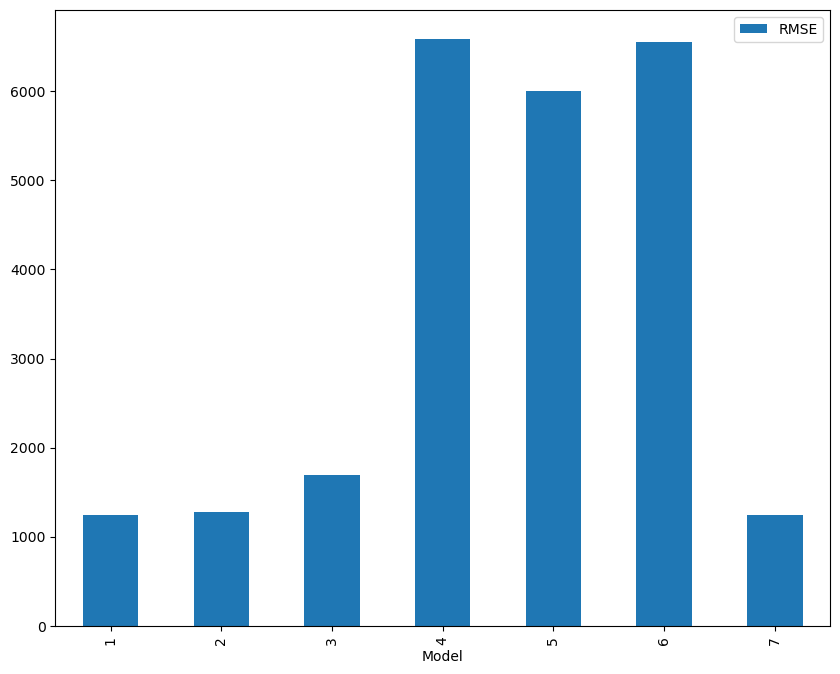

In [113]:
result=pd.DataFrame({'Model':[1,2,3,4,5,6,7],'RMSE':[1238.66,1280.40,1696.45,6584.66,6000.29,6552.28,1238.61]})
result.plot(kind='bar',x='Model',y='RMSE')

## Time Series Analysis

In [114]:
#copying the dataframe in another dataframe
df=df_energy.copy(deep=True)

In [115]:
#displaying the first five records
df.head()

,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,...,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,Date,Time
0,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,43.0,...,62,0.0,0.0,0.0,0,800,clear,sky is clear,2015-01-01,00:00:00
1,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,7096.0,43.0,...,62,0.0,0.0,0.0,0,800,clear,sky is clear,2015-01-01,01:00:00
2,448.0,323.0,4857.0,4581.0,157.0,1164.0,973.0,1371.0,7099.0,43.0,...,23,0.0,0.0,0.0,0,800,clear,sky is clear,2015-01-01,02:00:00
3,438.0,254.0,4314.0,4131.0,160.0,1503.0,949.0,779.0,7098.0,43.0,...,23,0.0,0.0,0.0,0,800,clear,sky is clear,2015-01-01,03:00:00
4,428.0,187.0,4130.0,3840.0,156.0,1826.0,953.0,720.0,7097.0,43.0,...,23,0.0,0.0,0.0,0,800,clear,sky is clear,2015-01-01,04:00:00


### Preparing the data

In [116]:
#Dropping all the columns except total actual load and date
#As in time series forecasting we require the column to be forecasted and the date
cols = ['generation biomass', 'generation fossil brown coal/lignite',
       'generation fossil gas', 'generation fossil hard coal',
       'generation fossil oil', 'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation nuclear',
       'generation other', 'generation other renewable', 'generation solar',
       'generation waste', 'generation wind onshore',
       'temp', 'pressure', 'humidity', 'wind_speed', 'wind_deg', 'rain_1h',
       'rain_3h', 'snow_3h', 'clouds_all', 'weather_id', 'weather_main',
       'weather_description','Time']
df=df.drop(cols,axis=1)
df = df.sort_values('Date')

In [117]:
#grouping the data by date and taking the sum of all the load on that date
df = df.groupby('Date')['total load actual'].sum().reset_index()

In [118]:
#setting the index of the dataframe to date
df.set_index('Date', inplace=True)

In [119]:
#displaying the final dataframe
df.head()

,total load actual
Date,
2015-01-01,573522.000000
2015-01-02,654031.000000
2015-01-03,602656.000000
2015-01-04,650703.000000
2015-01-05,578251.639431


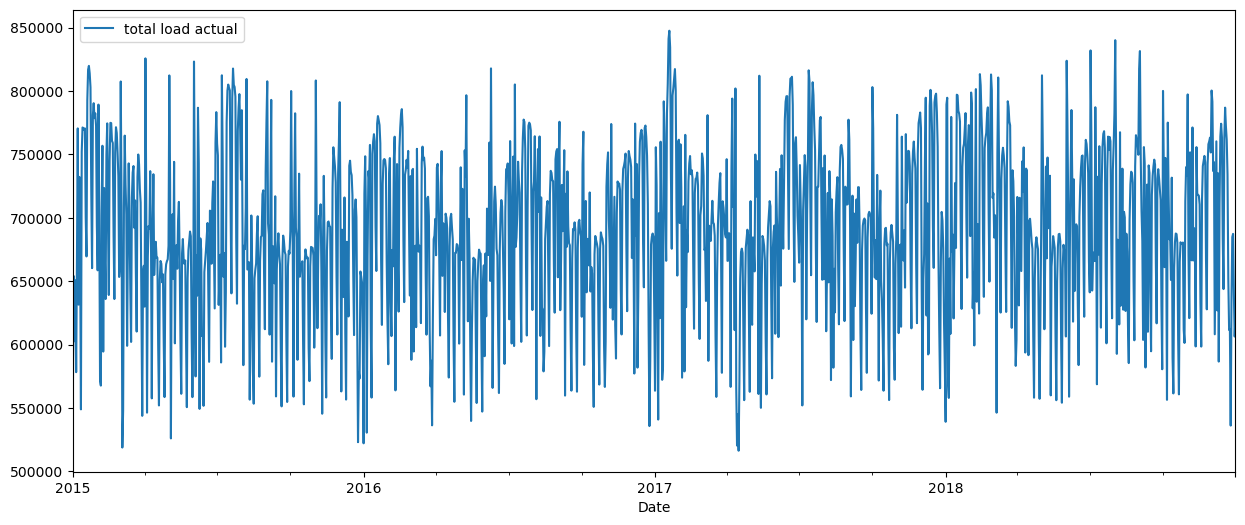

In [120]:
#plotting the dataframe in time axis
df.plot(figsize=(15, 6))
plt.show()

### Decomposing
Decomposing the time series into three distinct components: Trend, Seasonality, and Noise.

In [121]:
#Resampling the data by month as working with the current data is difficult due to lots of data
y = df['total load actual'].resample('MS').mean()

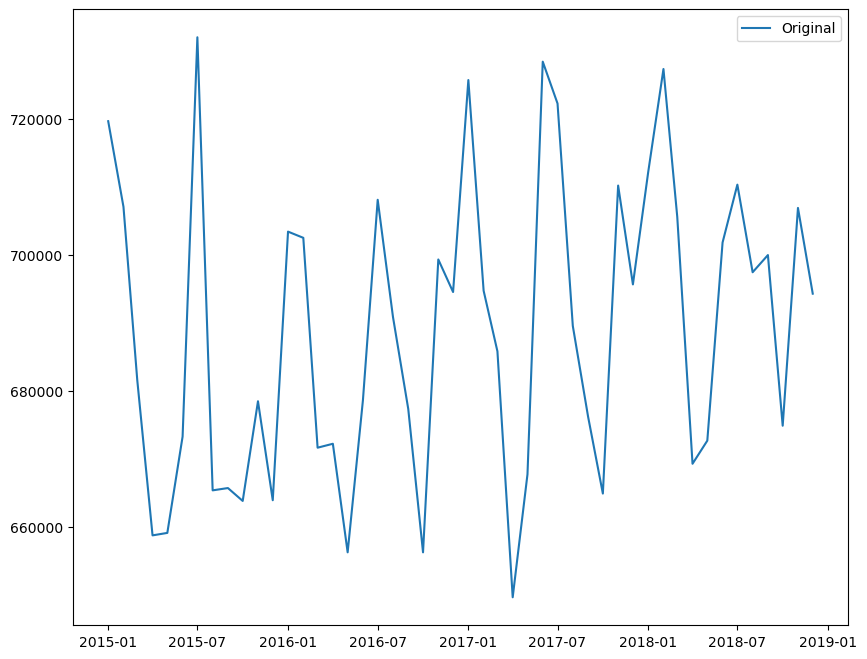

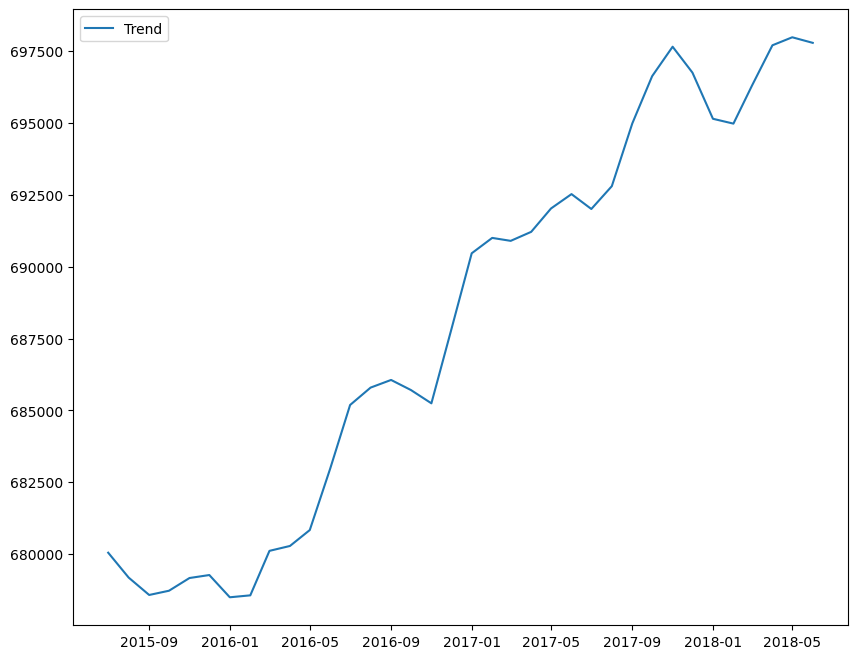

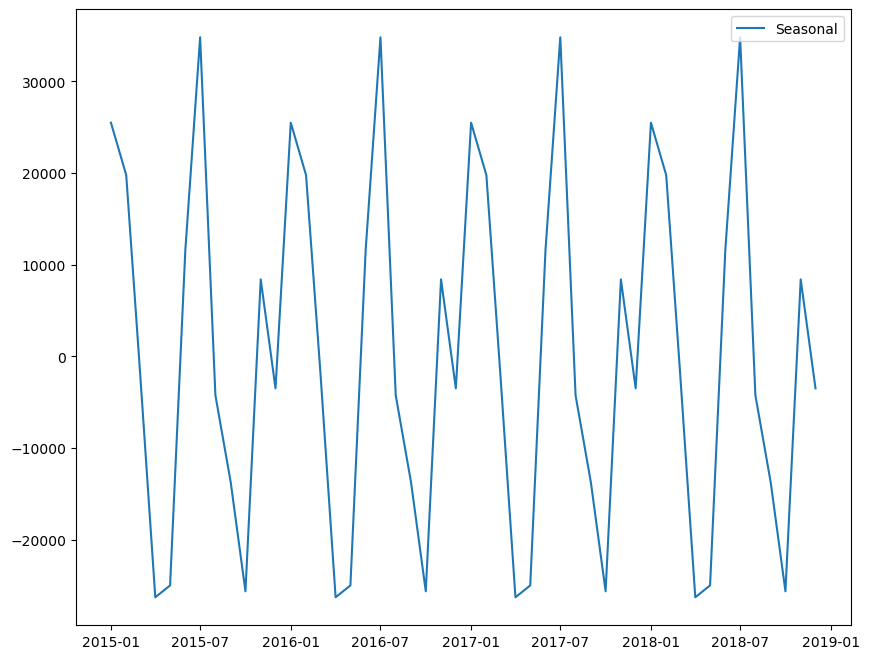

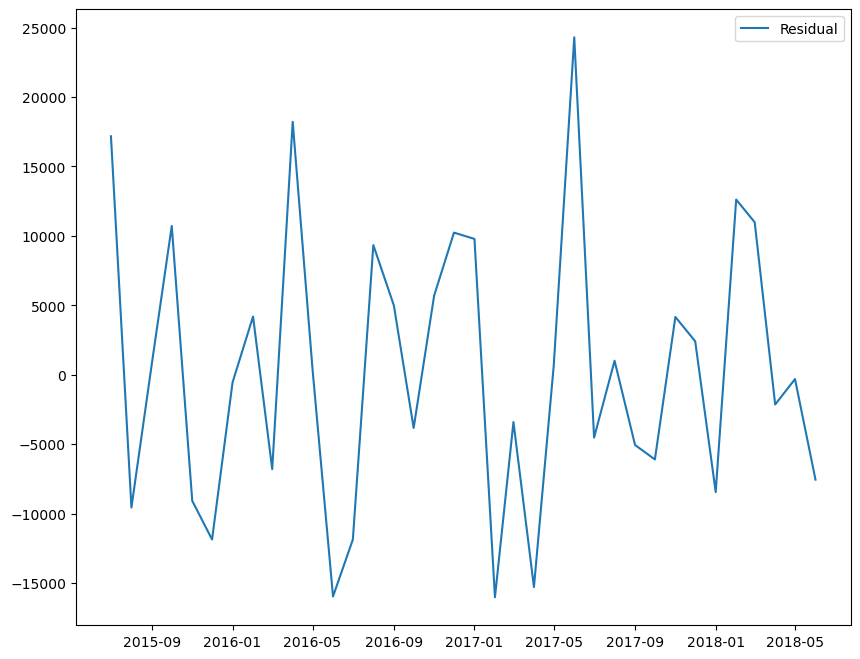

In [122]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(y)

plt.plot(y, label = 'Original')
plt.legend(loc = 'best')

trend = decomposition.trend
plt.show()
plt.plot(trend, label = 'Trend')
plt.legend(loc = 'best')

seasonal = decomposition.seasonal
plt.show()
plt.plot(seasonal, label = 'Seasonal')
plt.legend(loc = 'upper right')

residual = decomposition.resid
plt.show()
plt.plot(residual, label = 'Residual')
plt.legend(loc='best')

### Checking Stationarity

In [123]:
from pandas import Series
from statsmodels.tsa.stattools import adfuller

#series = Series.from_csv('daily-total-female-births.csv', header=0)
result = adfuller(y)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -0.815532
p-value: 0.814517
Critical Values:
	1%: -3.601
	5%: -2.935
	10%: -2.606


As the p-value is greater than 0.05, it means the series is not stationary.Even the statistics value is greater than the 1% critical value so we can conclude that the series is not stationary. 

In [124]:
#Differencing to make the series stationary
y = y - y.shift(1)

<Axes: xlabel='Date'>

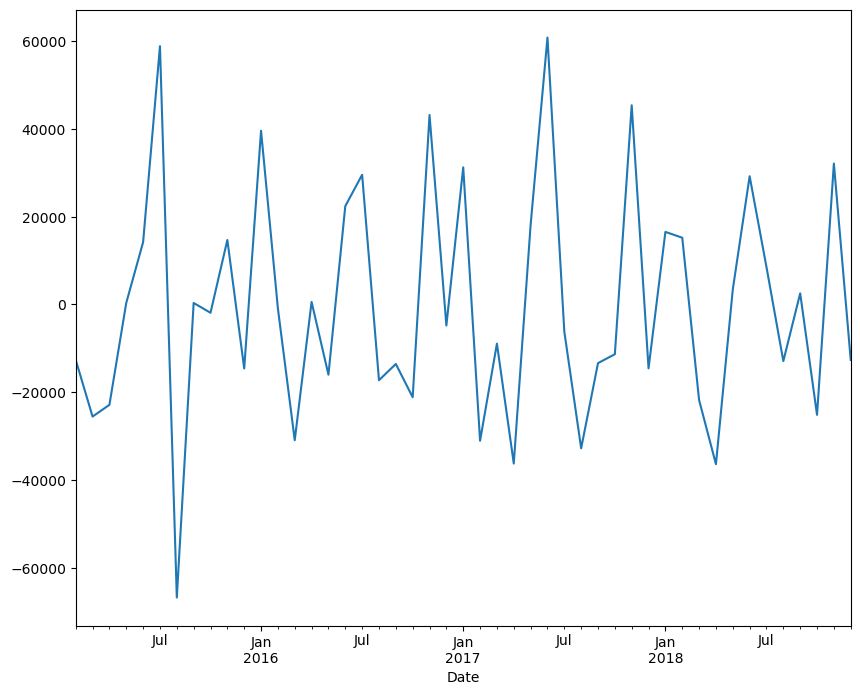

In [125]:
#plotting the series after differencing
y.dropna(inplace=True)
y.plot()

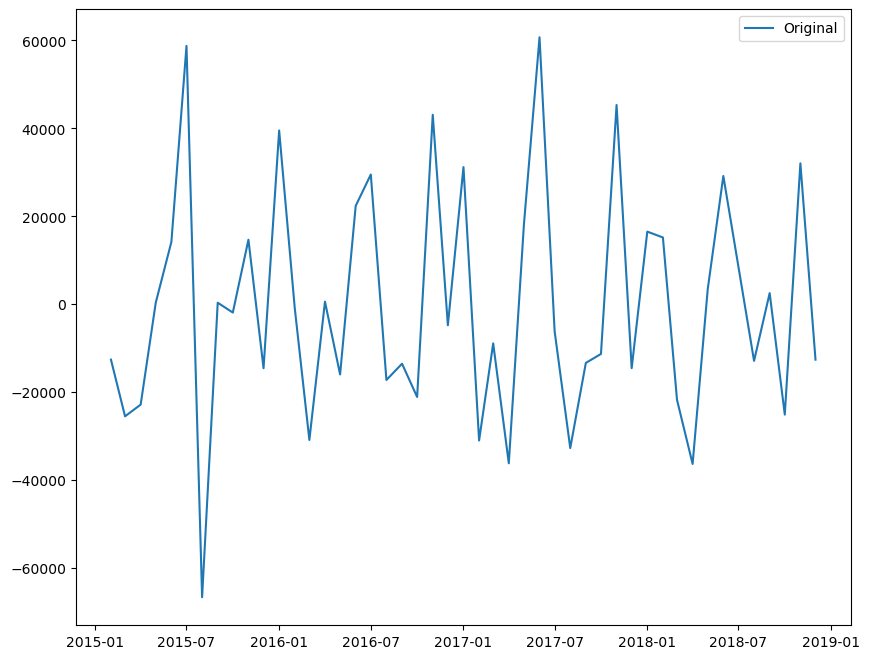

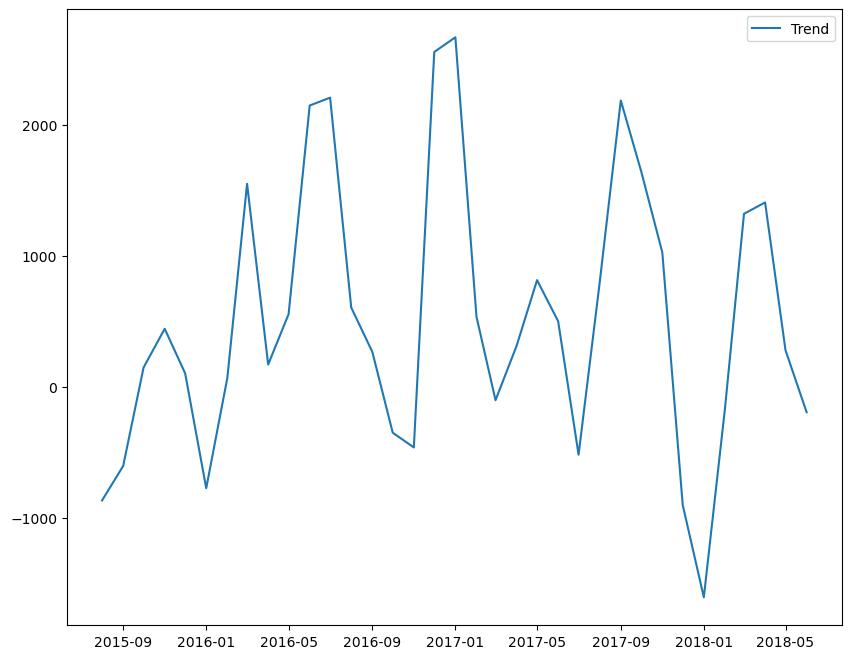

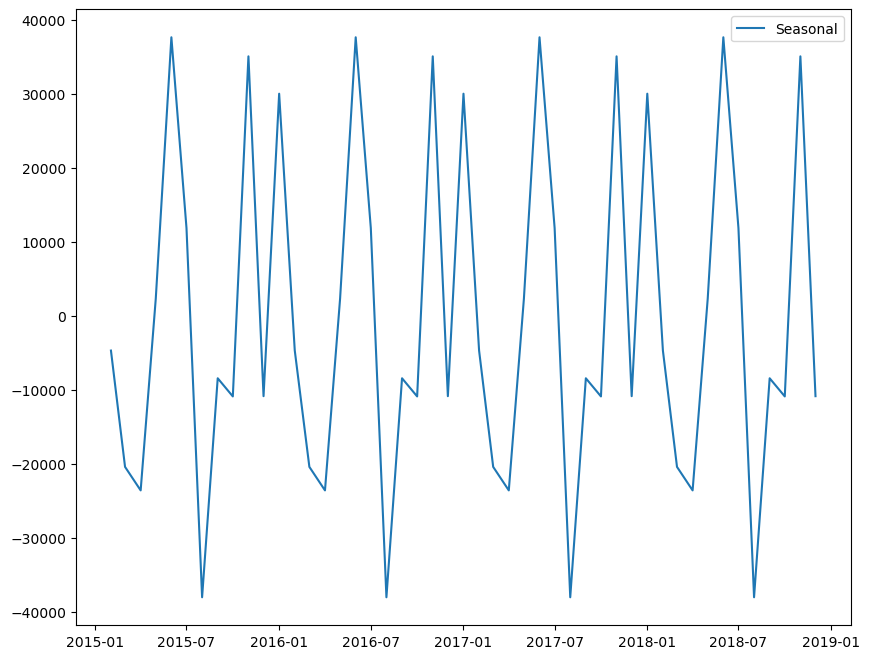

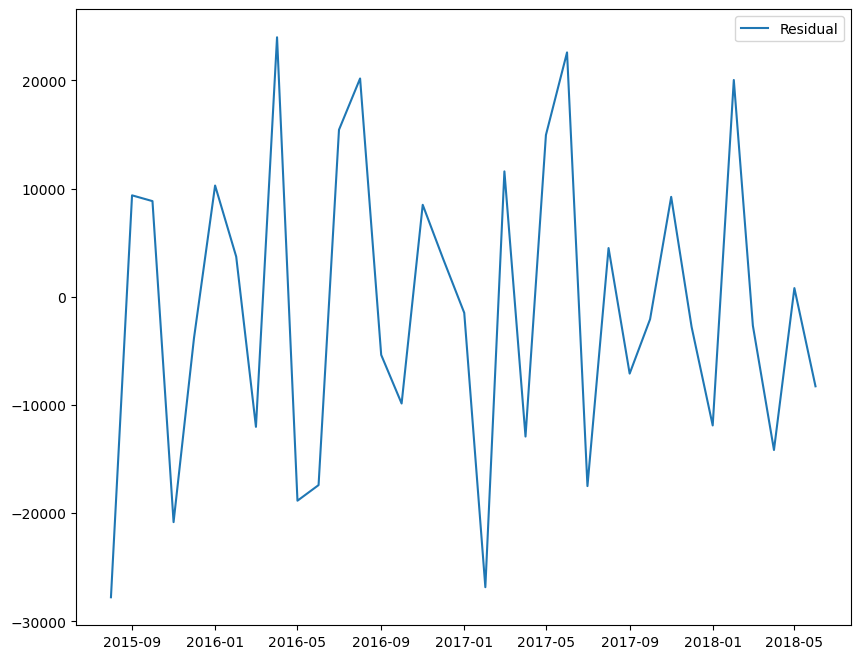

In [126]:
decomposition = seasonal_decompose(y)

plt.plot(y, label = 'Original')
plt.legend(loc = 'best')

trend = decomposition.trend
plt.show()
plt.plot(trend, label = 'Trend')
plt.legend(loc = 'best')

seasonal = decomposition.seasonal
plt.show()
plt.plot(seasonal, label = 'Seasonal')
plt.legend(loc = 'best')

residual = decomposition.resid
plt.show()
plt.plot(residual, label = 'Residual')
plt.legend(loc='best')

In [127]:
#Dividing the data into test and train
size = int(len(y) * 0.95)
train, test = y[0:size], y[size:len(y)]

## Time Series Forecasting Using ARIMA

In [128]:
import itertools

p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


### Parameter Selection 

In [129]:
from pylab import rcParams
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y, order=param,
seasonal_order=param_seasonal,
enforce_stationarity=False, 
enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1070.3836712932707
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1384.3442344024909
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:781.1540703302379
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:500.8936633241347
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:793.1330423960833
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:13929.765463689739
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:525.4578144232545
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:502.8813183264524
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1038.236220415501
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:12911.77471540692
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:751.432918423466
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:474.935779424304
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:796.5295540592098
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:11888.863379577933
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:519.0204963832983
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:476.6152561147872
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1086.128980078981
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1525.3264756804324
ARIMA(0

C:\Users\santh\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:524.8897355279466
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:499.6414579956447
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:1033.7825218255934
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:30606.549411317268
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:740.3904338194693


C:\Users\santh\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:461.26571496226336
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:789.4159642919253
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:29009.414134161394
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:508.2130052422863


C:\Users\santh\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:463.2647211036946
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:1071.1142217251756
ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:13323.944160304398
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:779.3524511481111
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:501.5939343932645
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:777.7678045140727


C:\Users\santh\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:1288.7223454168252
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:501.6385169843727
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:503.21550010738514
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:1033.9324556313882


C:\Users\santh\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:51690.55352613196
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:745.2137754472594
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:475.9697045176546
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:769.8019391270999


C:\Users\santh\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:50843.04054635184
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:498.489887896241
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:477.8191446816716
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:1074.986536826681
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:20136.009945553913
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:781.0758388238957
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:494.68660055888336
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:776.2458890128225
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:20072.697302374716
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:495.813696669479
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:496.67422355250255
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:1035.014574515697


C:\Users\santh\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:17279.01431886859
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:740.0476185211146
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:462.91628124490313
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:767.869812269476
ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:18804.525427817312
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:485.99648458981636
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:464.86168757940237


C:\Users\santh\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


### Fitting the ARIMA model

In [130]:
mod = sm.tsa.statespace.SARIMAX(y,order=(0, 1, 1),seasonal_order=(0, 1, 1, 12),enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9556      0.468     -2.043      0.041      -1.872      -0.039
ma.S.L12      -0.4909      0.435     -1.129      0.259      -1.343       0.361
sigma2      7.414e+08   4.45e-10   1.66e+18      0.000    7.41e+08    7.41e+08


### Running Model Diagnostics

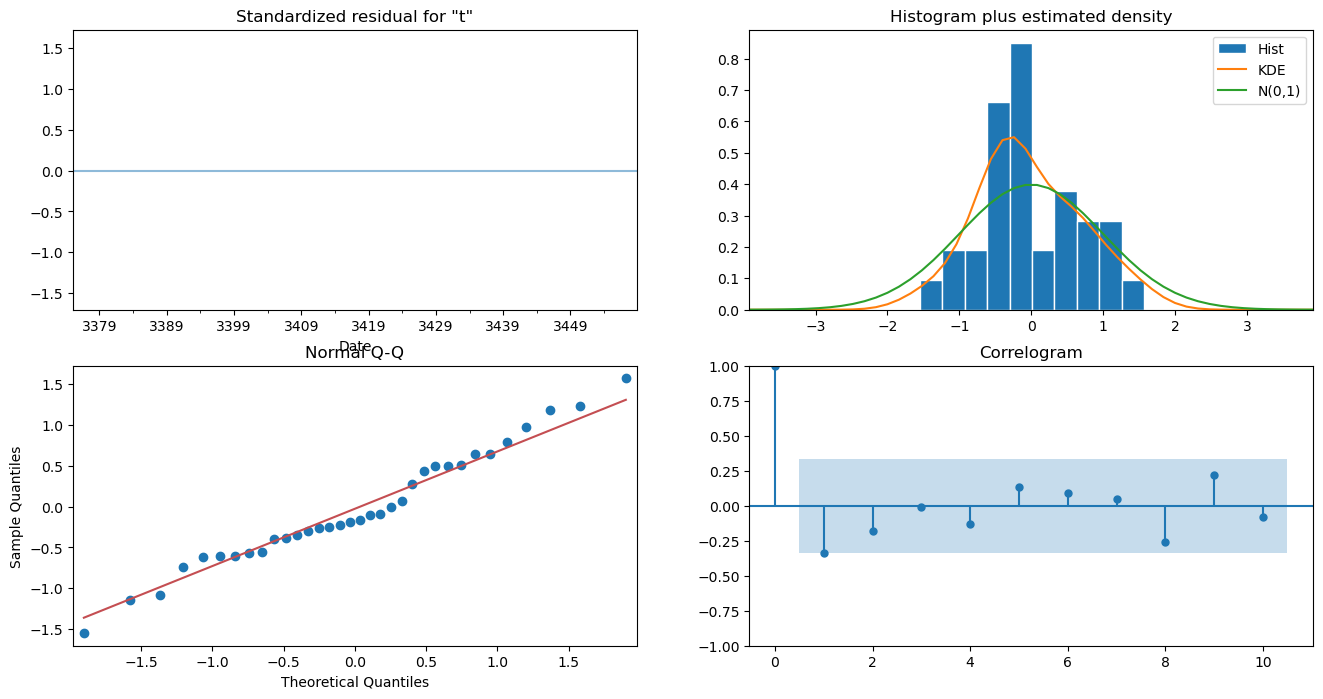

In [131]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

### Validating Forecasts

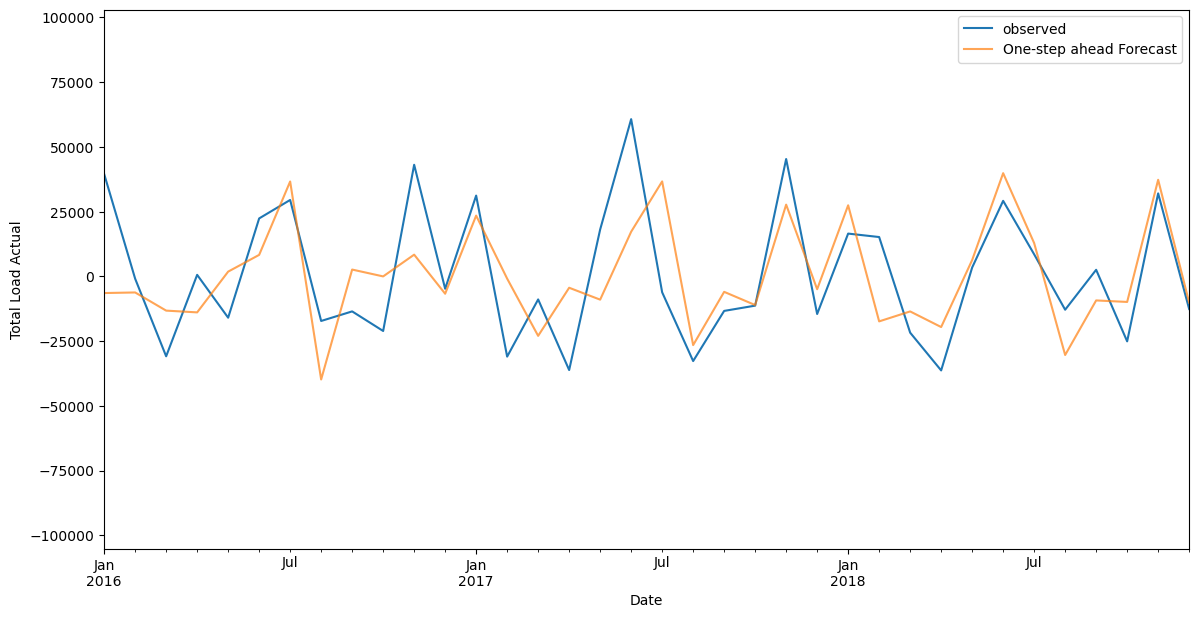

In [132]:
#set forecasts to start at 2017–01–01 to the end of the data to forecast
pred = results.get_prediction(start=pd.to_datetime('2016-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2016':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Total Load Actual')
plt.legend()
plt.show()

In [133]:
y_forecasted = pred.predicted_mean
y_truth = train['2016-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error of our forecasts is 451495066.55
The Root Mean Squared Error of our forecasts is 21248.41


### Conclusion:

Total 7 models have been built to predict the total load consumption depending upon various generation and weather factors.
Out of all the models we select the 7th model that is linear regression using SGD to predict the total load consumption because 
it has got the best Adjusted R-squared value and least RMSE value.

As we know that Adjusted R-squared gives us information about the best features added and RMSE gives us information about 
the least difference between actual and predicted value.Since RMSE value for linear regression with SGD is minimum so we select
this model to predict the power consumption.

Even from the statistical summary if we see the AIC,BIC and log-likelihood values, then we can observe that the AIC and BIC values
of linear regression with SGD is minimum.AIC and BIC is the penalty that is given to the model for losing information during model
building.So, as the values of AIC and BIC is minimum for the model we select this model.